In [16]:
import sys
sys.path.append('../../MembraneQuant')
from membranequant import *
import seaborn as sns
%matplotlib notebook

In [29]:
path_ring = '/Users/blandt/Desktop/Data/RING fragment/Experiment'
paths_ring = direcslist(path_ring, 1)
imgs_ring = [load_image(p + '/af_corrected.tif') for p in paths_ring]
rois_ring = [np.loadtxt(p + '/ROI_fit.txt') for p in paths_ring]
dosages_ring = [dosage(i, r, 5) for i, r in zip(imgs_ring, rois_ring)]

path_ctrl = '/Users/blandt/Desktop/Data/T2A/210804_nwg378_tom4,5,60,500'
paths_ctrl = direcslist(path_ctrl, 0)
imgs_ctrl = [load_image(p + '/af_corrected.tif') for p in paths_ctrl]
rois_ctrl = [np.loadtxt(p + '/ROI_fit.txt') for p in paths_ctrl]
dosages_ctrl = [dosage(i, r, 5) for i, r in zip(imgs_ctrl, rois_ctrl)]

### Image

<IPython.core.display.Javascript object>


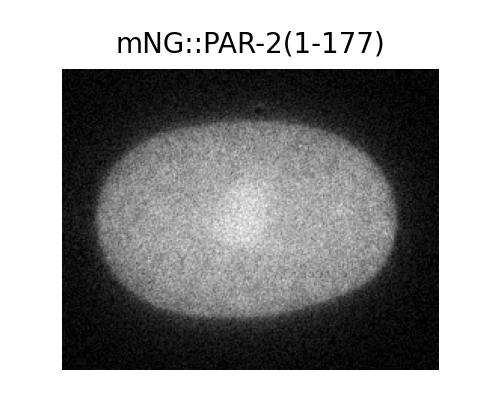

In [32]:
def func(path, ax):
    img = load_image(path + '/af_corrected.tif')
    roi = np.loadtxt(path + '/ROI.txt')
    rotated = rotated_embryo(img, roi, 250, 200, 3)
    ax.imshow(rotated, cmap='gray', vmin=0)
    ax.axis('off')
    
fig, ax = plt.subplots()
func(paths_ring[0], ax)
ax.set_title('mNG::PAR-2(1-177)', fontsize=10)
fig.set_size_inches(2.5, 2)
fig.tight_layout()
fig.savefig('Figs/img.png', dpi=600, transparent=True)

### Dosage

In [33]:
df = pd.DataFrame({'Label': ['mNG::RING'] * len(paths_ring) + ['mNG (free)'] * len(paths_ctrl), 
                   'Dosage': dosages_ring + dosages_ctrl})

<IPython.core.display.Javascript object>


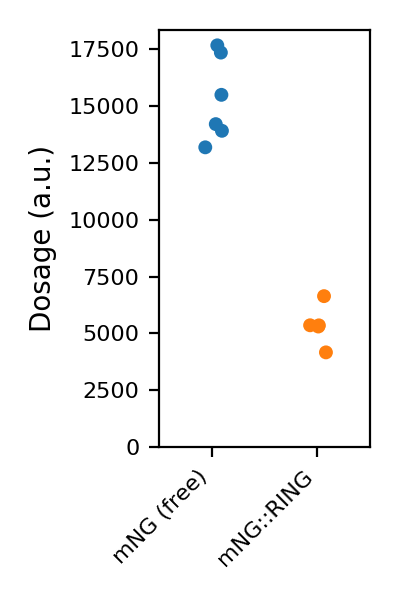

In [34]:
fig, ax = plt.subplots()
sns.stripplot(data=df, x='Label', y='Dosage', ax=ax, order=['mNG (free)', 'mNG::RING'])
ax.tick_params(axis='x', labelsize=8)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    tick.set_horizontalalignment('right')
ax.tick_params(axis='y', labelsize=8)
ax.set_ylabel('Dosage (a.u.)')
ax.set_xlabel('')
ax.set_ylim(bottom=0)
fig.set_size_inches(2,3)
fig.tight_layout()
fig.savefig('Figs/dosage.png', dpi=600, transparent=True)